# Example code for reading German Traffic Signs dataset 

The following code is an example showing us how to read our dataset.

This is a huge dataset: more than 50,000 color images in total! So, the challenge will be managing such a large collection of images, including all the annoying indexing. 

The following code was provided by the guys who manage the GTSRB dataset. Try out this helper function for reading in the data: 

In [1]:
import matplotlib.pyplot as plt
import csv

def readTrafficSigns(rootpath, test_set = 0):
    '''
    Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Input: path to the traffic sign data, for example './GTSRB/Training'
    Output:   list of images, list of corresponding labels
    '''
    
    # Initialize the lists to store images, labels: 
    images = [] # images
    labels = [] # corresponding labels
    
    # loop over all 42 classes
    for c in range(0,43):
        # The csv contains annotations for each image.
        # Path to csv file: 
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file

        
        # Open and start reading the lines of the csv file: 
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        next(gtReader) # skip header
        
        # loop over all images in current annotations file
        for row in gtReader:
            # Add each image and label to their respective lists
            images.append(plt.imread(prefix + row[0])) # the 1th column is the filename
            labels.append(row[7]) # the 8th column is the label
        # Finally, close the csv file when we're done.
        gtFile.close()
        
    return images, labels

Now, let's use the function. Here, we show how to print the size of the dataset, and display one example image. 

39209 39209


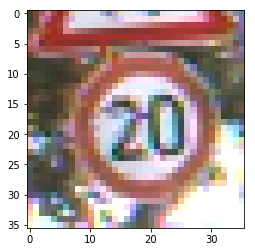

In [2]:
trainImages, trainLabels = readTrafficSigns('./Training/Final_Training/Images')
print(len(trainLabels), len(trainImages))
plt.imshow(trainImages[42])
plt.show()

And one more... 

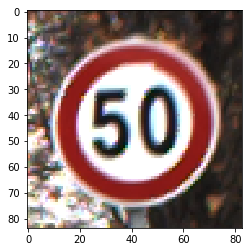

In [3]:
plt.imshow(trainImages[4400])
plt.show()

We can also check the size of each example: 

In [4]:
import numpy as np
print(np.shape(trainImages[4400]))

(84, 83, 3)


## Data Pre-Processing Exercises  

**The dark secret of machine learning is that machine learning researchers spend most of their time doing data pre-processing. So, we're devoting today to this: namely, taking the German Traffic Signs dataset and putting it in a form that we can give to an AI algorithm.**

Step 1. Perform the test-train split as we did in previous notebooks: 

In [7]:
# Split into training and testing data

# TODO 1: import necessary library

# TODO 2: Perform the test-train split using the training set that we read in above. 
# Keep 1/3 of the data in the test set and random_state = 42 for consistency with your peers. 


Step 2. Print the sizes of the training and test sets:

In [9]:
# TODO 1: print size of newly formed training set 
# TODO 2: print size of newly formed test set 

Step 3. What kinds of values are contained in your labels list? Try printing some examples. 

In [ ]:
# TODO: print some values of labels from training set 

Step 4. Now we want to write a function which: 
    - takes in a dataset and a label
    - returns a subset of the dataset matching that label.
Try implementing the function yourself: 

In [10]:
# TODO: write a function for parsing the data 

# Think: what are the inputs? What should the function return? 
# Hint: use a for loop 




    
    

Step 5: Test it! Use the function that you wrote to find all examples in the training set with label 0.

In [11]:
# X0, y0 = TODO 

# Then plot one example: 
# plt.imshow(X0[-1])
# plt.show()

Awesome! Now we have a convenient tool for exploring our data. 

Step 6. Let's choose two relatively different-looking classes, and then train a classifier to try and distinguish between the two. 

For example, class label 14 gives us the images of STOP signs. These are pretty different from the objects in, say, class 12. How well does a logistic regression model do? Try it out. 

In [12]:
# TODO 1: Use your function from above to take subsets of the training data: 
#     one for class 14, and one for your other class.




# TODO 2: Combine those two subsets to create a new training dataset. Also, print their shapes. 
# Hint: to add two lists, just do:     lista + listb 






# TODO 3: Use your function from above to take subsets of the test data: 
#     one for class 14, and one for your other class.




# TODO 2: Combine those two subsets to create a new test dataset. Also, print their shapes. 
# Hint: to add two lists, just do:     lista + listb 







Step 7. Given an image, let's practice some basic image processing: 

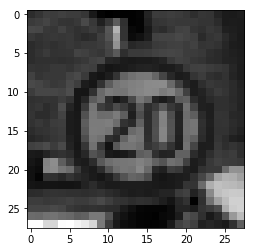

(28, 28)
(784,)


In [10]:
import cv2

# Convert image to grayscale: 
gray = cv2.cvtColor( X0[-1], cv2.COLOR_RGB2GRAY )

# Re-size the image to a 28x28 pixel image (see last Jupyter notebook for examples):
# gray = TODO 1
print(np.shape(gray))

# Display the image: 
plt.imshow(gray, cmap='gray')
plt.show()

# Re-shape the image into a 1-dimensional array:
gray_flat = gray.reshape(-1)
print(np.shape(gray_flat))


Step 8. We practiced manipulating one image. Now let's write a function to take in an image and process it in the same way.

In [13]:
# TODO Make a function to process images 
# We want this function to convert to grayscale, resize the images, and reshape into a 1-dimensional array 








Step 9: Test your function on an example image.

In [ ]:
img = X0[-1]
# test_thing = TODO: call your function on img! 
print(np.shape(test_thing))

Step 10. Here's another tricky part: Use your image processing function to modify all the images in your training set. Then store them all together in an array. This is what we'll give the classifier model! 

In [ ]:
# TODO: Use a for loop to loop over all the examples in the training set.
# At each iteration, call your function, and add the array to a growing 2-D array.
# Hint: To add a new row to a matrix, you can use:
#     A = np.vstack([A, new_row])





# Print the size of the array:
# print(np.shape(A))


Step 11: Repeat Step 10 for the test set. 

In [15]:
# TODO: Use a for loop to loop over all the examples in the test set.
# At each iteration, call your function, and add the array to a growing 2-D array.
# Hint: To add a new row to a matrix, you can use:
#     A = np.vstack([A, new_row])





# Print the size of the array:
# print(np.shape(A))



Step 12. You made it! Finally, we can train a model on our brand-new training set. 

In [16]:
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

#logisticRegr.fit(TODO 1, TODO 2)


Step 13. Now, predict using your test set. 

In [17]:
# predictions = logisticRegr.predict(TODO)

Step 14. Print the shape of your predictions output. Is it consistent with your test set labels array? 

In [ ]:
print(np.shape(predictions))

Step 15. Also, print the score. How well does your model perform? 

In [19]:
# score = logisticRegr.score(TODO 1, TODO 2)
print(score)

Step 16. Last but not least, let's use your trained model to predict the label of a single test image. Choose one to verify that your classifier is working well! 

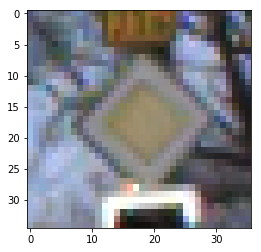

[12]


In [22]:
# First, choose a test image and display it.
#plt.imshow( TODO 1 )
#plt.show()

# Then, convert the image using your image processing function:
#test_im = TODO 2

# We need this extra line to pass a single example into logisticRegr.predict():
#test_im = test_im.reshape(1, -1)

test_pred = logisticRegr.predict(test_im)
# Print your predicted label. Is it correct?
# TODO 3